In this tutorial, we will be walking through the implementation details of D2_nn4_quad elements. Here they are visualized in their natural coordinates with 4 nodes and 4 Gaussian integration points (we will get to this later)

In [7]:
from finiteelementanalysis import discretization_demo_helper_fcns as di_demo

ele_type = "D2_nn4_quad"
num_gauss_pts = 4
fname = "D2_nn4_quad_4gp.png"
di_demo.visualize_gauss_pts(fname, ele_type, num_gauss_pts)

![D2_nn4_gp4_quad](D2_nn4_quad_4gp.png "Bilinear quad element")

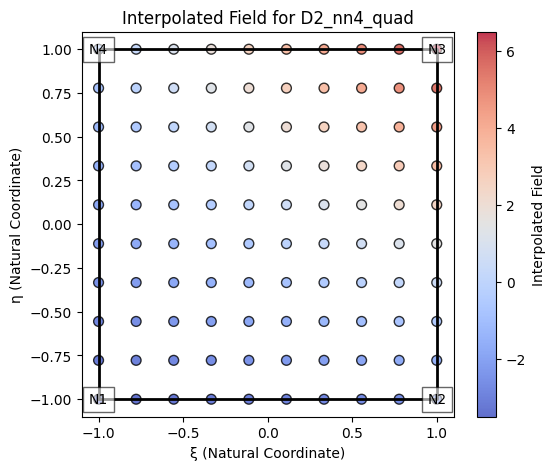

In [1]:
from finiteelementanalysis import discretization_demo_helper_fcns as di_demo
import numpy as np

def fcn(xi, eta):
    return 2.0 * xi + 3.0 * eta + 1.5 * xi * eta

ele_type = "D2_nn4_quad"
node_coords = np.array([[-1, -1], [1, -1], [1, 1], [-1, 1]])
node_values = np.array([fcn(xi, eta) for xi, eta in node_coords])

fname = ele_type + "_interpolate_fcn.png"
di_demo.plot_interpolate_field_natural_coords_single_element(fname, ele_type, node_values)

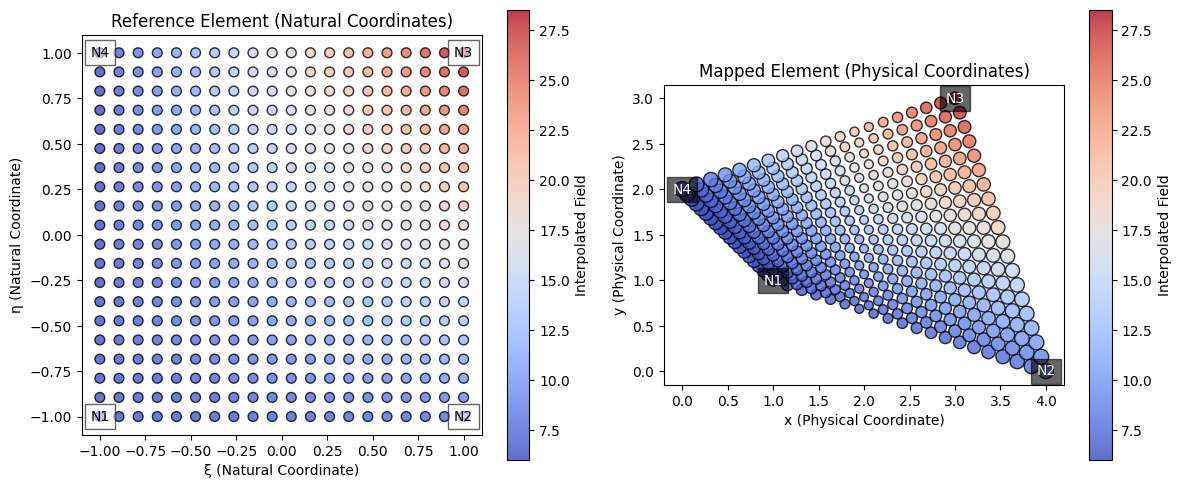

In [2]:
from finiteelementanalysis import discretization_demo_helper_fcns as di_demo
import numpy as np

def fcn(x, y):
    return 2.0 * x + 3.0 * y + 1.5 * x * y

ele_type = "D2_nn4_quad"
node_coords = np.array([[1, 1], [4, 0], [3, 3], [0, 2]])
node_values = np.array([fcn(x, y) for x, y in node_coords])
fname = ele_type + "_interpolate_fcn_physical_coords.png"
di_demo.visualize_isoparametric_mapping_single_element(str(fname), ele_type, node_coords, node_values)

In [10]:
from finiteelementanalysis import discretization_demo_helper_fcns as di_demo
import numpy as np

def fcn(x, y):
    return 2.0 * x + 3.0 * y + 1.5 * x * y

def fcn_deriv(x, y):
    return np.asarray([2.0 + 1.5 * y, 3.0 + 1.5 * x]).reshape((2, 1))

ele_type = "D2_nn4_quad"
node_coords = np.array([[0, 0], [2, 0], [2, 2], [0, 2]])
node_values = np.array([fcn(x, y) for x, y in node_coords])

xi, eta = 0, 0  # element center in natural coordinates

# Map the test point from natural to physical coordinates
x_mapped = di_demo.interpolate_field_natural_coords_single_element(
    ele_type, node_coords[:, 0], [xi], [eta]
).flatten()[0]
y_mapped = di_demo.interpolate_field_natural_coords_single_element(
    ele_type, node_coords[:, 1], [xi], [eta]
).flatten()[0]

# Evaluate the function derivative in physical coordinates
mapped_deriv = fcn_deriv(x_mapped, y_mapped)

# Compute the numerical gradient in natural coordinates
gradient_natural = di_demo.interpolate_gradient_natural_coords_single_element(
    ele_type, node_values, np.array([xi]), np.array([eta])
)

# Transform the numerical gradient to physical coordinates
gradient_physical = di_demo.transform_gradient_to_physical(
    ele_type, node_coords, np.array([xi]), np.array([eta]), gradient_natural
).reshape((2, 1))

if np.allclose(mapped_deriv, gradient_physical, atol=10e-10):
    print("analytical and numerical derivatives match!")


analytical and numerical derivatives match!


In [13]:
from finiteelementanalysis import discretization_demo_helper_fcns as di_demo
import numpy as np

def fcn(x, y):
    return 3.0 * x + 10.0 * y

def fcn_deriv(x, y):
    return np.asarray([3.0, 10.0])  # df/dx = 3.0, df/dy = 0

def element_area(node_coords):
    x1, y1 = node_coords[0]
    x2, y2 = node_coords[1]
    x3, y3 = node_coords[2]
    x4, y4 = node_coords[3]
    area = 0.5 * abs((x1 * y2 + x2 * y3 + x3 * y4 + x4 * y1) 
                     - (y1 * x2 + y2 * x3 + y3 * x4 + y4 * x1))
    return area

def integral_of_deriv(node_coords):
    area = element_area(node_coords)
    return np.array([3.0 * area, 10.0 * area]).reshape((2, 1))

ele_type = "D2_nn4_quad"
num_gauss_pts = 4
node_coords = np.array([[0, 0], [2, 0], [2, 2], [0, 2]])

# Compute nodal values from fcn(x, y)
nodal_values = np.array([[fcn(x, y) for x, y in node_coords]]).T

# Compute numerical integral
integral_numerical = di_demo.compute_integral_of_derivative(
    ele_type, num_gauss_pts, node_coords, nodal_values)

# Compute analytical integral
integral_analytical = integral_of_deriv(node_coords)

# check result
if np.allclose(integral_numerical, integral_analytical, atol=10e-10):
    print("analytical and numerical integrals of derivatives match!")

analytical and numerical integrals of derivatives match!
